In [399]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Webscrapping Using Selenium

In [93]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [94]:
#defining webdriver
driver = webdriver.Chrome('C:\\Users\\asus\\OneDrive\\Desktop\\WeCloudData\\python2\\chromedriver_win32\\chromedriver.exe')

In [96]:
# using selnium function to login onto the website 
driver.get("https://housesigma.com/web/en") #home
driver.implicitly_wait(6)
#sign in click button
driver.find_element_by_xpath('//*[@id="nav"]/div[1]/div[2]/div[3]/a[1]').click()
from time import sleep
sleep(2)
driver.find_element_by_xpath('//*[@id="pane-email"]/form/div[1]/div/div/input').send_keys("****************") 
driver.find_element_by_xpath('//*[@id="pane-email"]/form/div[2]/div/div/input').send_keys("****************")
driver.find_element_by_xpath('//*[@id="login"]/div[2]/div/div[3]/button/span').click()

In [97]:
# Select customised button to filter only GTA - WEST Cities.
customize_button = driver.find_element_by_xpath('//*[@id="index"]/div[3]/div[2]/div/span/button').click()
Brampton = driver.find_element_by_xpath('//*[@id="index"]/div[2]/div/div[2]/div[3]/div[2]/div[4]/div[2]/span[1]').click()
Mississauga = driver.find_element_by_xpath('//*[@id="index"]/div[2]/div/div[2]/div[3]/div[2]/div[4]/div[2]/span[2]').click()
Oakville = driver.find_element_by_xpath('//*[@id="index"]/div[2]/div/div[2]/div[3]/div[2]/div[4]/div[2]/span[3]').click()
Burlington = driver.find_element_by_xpath('//*[@id="index"]/div[2]/div/div[2]/div[3]/div[2]/div[4]/div[2]/span[4]').click()
Milton = driver.find_element_by_xpath('//*[@id="index"]/div[2]/div/div[2]/div[3]/div[2]/div[4]/div[2]/span[5]').click()
Halton_Hilles =driver.find_element_by_xpath('//*[@id="index"]/div[2]/div/div[2]/div[3]/div[2]/div[4]/div[2]/span[6]').click()
Caledon = driver.find_element_by_xpath('//*[@id="index"]/div[2]/div/div[2]/div[3]/div[2]/div[4]/div[2]/span[7]').click()
save_button = driver.find_element_by_xpath('//*[@id="index"]/div[2]/div/div[3]/span/button[3]').click()

In [98]:
# opening webpage of just sold by clicking "see more" on the home page and get all the listings sold in the last few months.
banners = driver.find_element_by_xpath('//*[@id="index"]/div[3]/div[4]/div[1]/div[1]/a').click()

In [60]:
#scrolling just sold webpage to get multiple listings 
from time import sleep;
for i in tqdm(range(500)):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")
    sleep(2)

100%|██████████| 500/500 [16:53<00:00,  2.03s/it]


In [61]:
# returning information from the page
page_source = driver.page_source

In [62]:
from bs4 import BeautifulSoup

In [63]:
prop = BeautifulSoup(driver.page_source)

In [64]:
#creating list of class of all listings 
listing = prop.find_all('div',class_="el-card advertisement card is-always-shadow")
len(listing)

2373

In [66]:
prop_page = prop.find_all('a',class_="global-link image")
len(prop_page)

2373

In [68]:
#creating list of individual listing webpage
prop_pagelink = []
for i in range(len(prop_page)):
    link = prop.find_all('a',class_="global-link image")[i].get('href')
    prop_pagelink.append(link)

In [1184]:
prop_pagelink

['/web/en/house/aQmD7znlbW47J9Bo/1653-Glenburnie-Rd-Mississauga-L5G3E4-W5113750',
 '/web/en/house/eQp5yO8aX6v7d0ZE/2970-Berwick-Dr-15-Burlington-L7M4W3-W5121770-H4097462',
 '/web/en/house/Vwod7vrQv1275mGN/36-Solway-Ave-Brampton-L6Z4E3-W5120865',
 '/web/en/house/GMnKYqpLveQ3w1Qr/38-Ridgefield-Crt-Brampton-L6B1P4-W5120465',
 '/web/en/house/JRv53KDNGe2YVPW4/4781-Yorkshire-Ave-Mississauga-L4Z4H2-W5120253',
 '/web/en/house/amgL7A4ldwbyZ1MW/1905-Broad-Hollow-Gate-31-Mississauga-L5L5X2-W5119974',
 '/web/en/house/gAaOyL8NGnZyGxMb/11-Eden-Park-Dr-Brampton-L6T3A5-W5119642',
 '/web/en/house/Z5BX32zwE053Dar0/82-Beardmore-Cres-Halton-Hills-L7J2Z3-W5119676-40069436',
 '/web/en/house/B5bO3xXqbrg3kWVP/550-Buckeye-Crt-Milton-L9E1M2-W5117487',
 '/web/en/house/AKv53DD2V9V3MnxB/38-Pauline-Cres-Brampton-L7A2V6-W5114863',
 '/web/en/house/eQp5yO8anlG7d0ZE/1588-Kerns-Rd-4-Burlington-L7P3A7-W5114733-40066498',
 '/web/en/house/Zaw5Yo50Zg47n961/1201-North-Shore-Blvd-E-903-Burlington-L7S1Z5-W5113409',
 '/web/en/h

#1listed_price500         0 - 499
#2listed_price500_1000    500 - 999
#3listed_price1000_1500   1000 - 1499
#4listed_price1500_2000   1500 - 1999
#5listed_price2000_2377   2000 - 2376
len(listed_price)

In [99]:
# Extracting the price for which the listings were listed for
listed_price2000_2373 = []
for i in tqdm(range(2000,2373)):
    driver.get('https://housesigma.com'+prop_pagelink[i])
    sleep(5)
    soup = BeautifulSoup(driver.page_source)
    try: 
        priceb = soup.find('div', class_='price_listing price_grey') #object
    except:
        priceb = np.nan
    listed_price2000_2373.append(priceb)

100%|██████████| 373/373 [34:23<00:00,  5.53s/it]


In [103]:
#appending all the lists of price listing of the properties.
pricelisting = listed_price500 + listed_price500_1000 +listed_price1000_1500 +listed_price1500_2000 + listed_price2000_2373

In [105]:
len(pricelisting)

2373

In [107]:
pricelisting

[<div class="price_listing price_grey"><label>Listed for:</label> <!-- --> <span>$ 1,049,000</span></div>,
 <div class="price_listing price_grey"><label>Listed for:</label> <!-- --> <span>$ 849,900</span></div>,
 <div class="price_listing price_grey"><label>Listed for:</label> <!-- --> <span>$ 839,900</span></div>,
 <div class="price_listing price_grey"><label>Listed for:</label> <!-- --> <span>$ 849,000</span></div>,
 <div class="price_listing price_grey"><label>Listed for:</label> <!-- --> <span>$ 1,039,000</span></div>,
 <div class="price_listing price_grey"><label>Listed for:</label> <!-- --> <span>$ 829,000</span></div>,
 <div class="price_listing price_grey"><label>Listed for:</label> <!-- --> <span>$ 569,900</span></div>,
 <div class="price_listing price_grey"><label>Listed for:</label> <!-- --> <span>$ 789,000</span></div>,
 <div class="price_listing price_grey"><label>Listed for:</label> <!-- --> <span>$ 739,900</span></div>,
 <div class="price_listing price_grey"><label>Liste

In [108]:
#Extracting listed price of every property from the above list : pricelisting and creating a list out of it.
listed_price = []
for i in range(len(pricelisting)):
    try:
        a = pricelisting[i].get_text().split(" ")[-1]
    except:
        a = np.nan
    listed_price.append(a)

In [110]:
listed_price

['1,049,000',
 '849,900',
 '839,900',
 '849,000',
 '1,039,000',
 '829,000',
 '569,900',
 '789,000',
 '739,900',
 '899,000',
 '738,800',
 '669,900',
 '799,000',
 '779,000',
 '599,000',
 '499,900',
 '522,900',
 '839,900',
 '468,800',
 '549,450',
 '679,000',
 '549,450',
 '549,000',
 '1,049,900',
 '849,900',
 '1,199,900',
 '849,900',
 '749,900',
 '849,900',
 '749,900',
 '1,099,000',
 '399,000',
 '728,800',
 '949,000',
 '799,000',
 '874,900',
 '875,000',
 '1,198,800',
 '798,500',
 '449,900',
 '899,900',
 '979,000',
 '829,000',
 '849,900',
 '399,900',
 '1,099,000',
 '849,900',
 '999,800',
 '699,900',
 '899,900',
 '474,900',
 '799,000',
 '798,500',
 '585,000',
 '599,900',
 '799,000',
 '-',
 '899,900',
 '899,900',
 '550,000',
 '588,000',
 '1,199,000',
 '649,000',
 '899,900',
 '785,000',
 '419,000',
 '899,900',
 '991,000',
 '509,000',
 '775,000',
 '999,999',
 '449,001',
 '515,000',
 '399,900',
 '620,000',
 '1,199,000',
 '1,149,000',
 '629,000',
 '749,900',
 '799,000',
 '1,200,000',
 '698,888',


In [109]:
len(listed_price)

2373

In [641]:
#Extracting all the other information from webscrapping
address = []
housetype = []
rooms = []
sold = []
dates = []
for tag in listing:
    try:
        add = tag.find('span',class_="address").get_text()
    except:
        add = np.nan
    try:
        house = tag.find('span',class_='house_type').get_text()
    except:
        house = np.nan
    try:
        room = tag.find('span',class_="rooms").get_text()
    except:
        room = np.nan
    try:
        soldfor = tag.find('span',class_="price").get_text()
    except:
        soldfor = np.nan
    try:
        date = tag.find('div',class_='bottom').get_text()
    except:
        date = np.nan
    
    address.append(add)
    housetype.append(house)
    rooms.append(room)
    sold.append(soldfor)
    dates.append(date) 

##### Created dataframe from webscrapping

In [686]:
#Building Dictionary on all the lists created above and buiding dataframe out of it.
data_dict = {
    'address': address,
    'housetype': housetype,
    'rooms': rooms,
    'sold':sold,
    'listed_price':listed_price,
    'dates': dates    
}

df = pd.DataFrame(data_dict)

In [687]:
df

address        housetype  \
0             1653 Glenburnie Rd, Mississauga - Mineola         Detached   
1               15 - 2970 Berwick Dr, Burlington - Rose  Condo Townhouse   
2             36 Solway Ave, Brampton - Heart Lake East         Detached   
3     38 Ridgefield Crt, Brampton - Vales of Castlemore    Semi-Detached   
4          4781 Yorkshire Ave, Mississauga - Hurontario         Detached   
...                                                 ...              ...   
2368  308 - 30 Via Rosedale Rd, Brampton - Sandringh...        Condo Apt   
2369     409 - 25 Fairview Rd W, Mississauga - Fairview        Condo Apt   
2370  1107 - 200 Robert Speck Pkwy, Mississauga - Ci...        Condo Apt   
2371                  322 Hansen Rd N, Brampton - Madoc    Semi-Detached   
2372           134 Tremaine Rd, Milton - Milton Heights         Detached   

                                  rooms                 sold listed_price  \
0       3 Bedroom, 2 Bathroom, 1 Garage  Sold For:$1,056,000    1,049,000   
1       3 Bedroom, 3 Bathroom, 1 Garage  Sold For:$1,100,000      849,900   
2     3+1 Bedroom, 3 Bathroom, 1 Garage    Sold For:$910,000      839,900   
3     3+1 Bedroom, 4 Bathroom, 1 Garage    Sold For:$880,000      849,000   
4     3+2 Bedroom, 4 Bathroom, 1 Garage  Sold For:$1,200,000    1,039,000   
...                                 ...                  ...          ...   
2368    1 Bedroom, 1 Bathroom, 1 Garage    Sold For:$430,000      429,900   
2369    2 Bedroom, 2 Bathroom, 2 Garage    Sold For:$510,000      485,000   
2370  3+1 Bedroom, 2 Bathroom, 2 Garage    Sold For:$685,000      699,900   
2371    4 Bedroom, 2 Bathroom, 1 Garage    Sold For:$730,000      749,900   
2372    3 Bedroom, 1 Bathroom, 2 Garage  Sold For:$1,000,000    1,000,000   

                                 dates  
0     List: 2021-02-12 End: 2021-02-21  
1     List: 2021-02-19 End: 2021-02-20  
2     List: 2021-02-19 End: 2021-02-20  
3     List: 2021-02-18 End: 2021-02-20  
4     List: 2021-02-18 End: 2021-02-20  
...                                ...  
2368  List: 2021-01-11 End: 2021-01-24  
2369  List: 2021-01-08 End: 2021-01-24  
2370  List: 2021-01-07 End: 2021-01-24  
2371  List: 2020-11-07 End: 2021-01-24  
2372  List: 2020-11-03 End: 2021-01-24  

[2373 rows x 6 columns]

In [1189]:
#exporting raw data file 
df.to_csv(r'C:\\Users\\asus\\OneDrive\\Desktop\\WeCloudData\\python2\\file123.csv', index=False) 

In [688]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373 entries, 0 to 2372
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   address       2373 non-null   object
 1   housetype     2373 non-null   object
 2   rooms         2373 non-null   object
 3   sold          2373 non-null   object
 4   listed_price  2372 non-null   object
 5   dates         2373 non-null   object
dtypes: object(6)
memory usage: 111.4+ KB


In [689]:
df.isnull().sum()

address         0
housetype       0
rooms           0
sold            0
listed_price    1
dates           0
dtype: int64

# Data Cleaning

In [690]:
#Extracting City from Address
df['city'] = df.address.str.split(",",expand=True,)[1]
df['city'] = df.city.str.split('-',expand=True,)[0]

In [691]:
# Segregating room in bedroom, bathroom and garage
df[['bedroom','bathroom','garage']] = df.rooms.str.split(",",expand=True,)
df['bedroom'] = df.bedroom.str.split(' ',expand=True,)[0]
df['bathroom'] = df.bathroom.str.split(' ',expand=True,)[1]
df['garage'] = df.garage.str.split(' ',expand=True,)[1]

In [692]:
#Extracting listing date from address and converting to date type
df['listing_date']= df.dates.str.split(" ",expand=True,)[1]
df['listing_date'] = pd.to_datetime(df['listing_date'], format='%Y-%m-%d')

In [693]:
#Extracting acquisition date from address and converting to date type
df['acqusition_date']= df.dates.str.split(" ",expand=True,)[3]
df['acqusition_date'] = pd.to_datetime(df['acqusition_date'], format='%Y-%m-%d')

In [694]:
# Cleaning Selling price and converting it to integer
df['sold'] = df.sold.str.split("$",expand=True,)[1]

In [672]:
df.sold.str.split("$",expand=True,)[1]
df['sold'] = pd.to_numeric(df['sold'].str.replace(',','')).astype('Int64')

In [699]:
df.head()
#pd.to_numeric()

address        housetype  \
0          1653 Glenburnie Rd, Mississauga - Mineola         Detached   
1            15 - 2970 Berwick Dr, Burlington - Rose  Condo Townhouse   
2          36 Solway Ave, Brampton - Heart Lake East         Detached   
3  38 Ridgefield Crt, Brampton - Vales of Castlemore    Semi-Detached   
4       4781 Yorkshire Ave, Mississauga - Hurontario         Detached   

                               rooms     sold listed_price  \
0    3 Bedroom, 2 Bathroom, 1 Garage  1056000    1,049,000   
1    3 Bedroom, 3 Bathroom, 1 Garage  1100000      849,900   
2  3+1 Bedroom, 3 Bathroom, 1 Garage   910000      839,900   
3  3+1 Bedroom, 4 Bathroom, 1 Garage   880000      849,000   
4  3+2 Bedroom, 4 Bathroom, 1 Garage  1200000    1,039,000   

                              dates           city bedroom bathroom garage  \
0  List: 2021-02-12 End: 2021-02-21   Mississauga        3        2      1   
1  List: 2021-02-19 End: 2021-02-20    Burlington        3        3      1   
2  List: 2021-02-19 End: 2021-02-20      Brampton      3+1        3      1   
3  List: 2021-02-18 End: 2021-02-20      Brampton      3+1        4      1   
4  List: 2021-02-18 End: 2021-02-20   Mississauga      3+2        4      1   

  listing_date acqusition_date  
0   2021-02-12      2021-02-21  
1   2021-02-19      2021-02-20  
2   2021-02-19      2021-02-20  
3   2021-02-18      2021-02-20  
4   2021-02-18      2021-02-20

In [666]:
# Cleaning listing price and converting it to integer
df['listed_price'] = pd.to_numeric(df.listed_price.str.replace(',',''))

ValueError: Unable to parse string "-" at position 56

In [702]:
# Checking nulls in the dataframe
df.isnull().sum()

address            0
housetype          0
rooms              0
sold               8
listed_price       1
dates              0
city               0
bedroom            0
bathroom           8
garage             8
listing_date       0
acqusition_date    8
dtype: int64

In [703]:
#Chekcing records for nulls 
df[df.bathroom.isnull()]

address           housetype  \
56            Unit 51 - 399 Vodden St, Brampton - Madoc     Condo Townhouse   
144   Unit 404 - 128 Garden Dr, Oakville - Old Oakville           Condo Apt   
295              3371 Cardiff Cres, Burlington - Headon            Detached   
533            100 Aspen Hills Rd, Brampton - Bram West  Freehold Townhouse   
589                      658 Holly Ave, Milton - Coates  Freehold Townhouse   
1084                    443 Pringle Ave, Milton - Scott            Detached   
1088     67 Tulip Dr, Brampton - Fletcher's Creek South  Freehold Townhouse   
2149                     409 Hincks Dr, Milton - Clarke            Detached   

     rooms  sold listed_price              dates          city bedroom  \
56          <NA>            -  List: 2021-02-09      Brampton            
144         <NA>            -  List: 2021-02-09      Oakville            
295         <NA>            -  List: 2021-02-11    Burlington            
533         <NA>            -  List: 2021-02-13      Brampton            
589         <NA>            -  List: 2021-02-08        Milton            
1084        <NA>            -  List: 2021-02-08        Milton            
1088        <NA>            -  List: 2021-02-08      Brampton            
2149        <NA>            -  List: 2021-01-25        Milton            

     bathroom garage listing_date acqusition_date  
56       None   None   2021-02-09             NaT  
144      None   None   2021-02-09             NaT  
295      None   None   2021-02-11             NaT  
533      None   None   2021-02-13             NaT  
589      None   None   2021-02-08             NaT  
1084     None   None   2021-02-08             NaT  
1088     None   None   2021-02-08             NaT  
2149     None   None   2021-01-25             NaT

In [704]:
df[df.listed_price.str.contains('-') == True]

address           housetype  \
56            Unit 51 - 399 Vodden St, Brampton - Madoc     Condo Townhouse   
144   Unit 404 - 128 Garden Dr, Oakville - Old Oakville           Condo Apt   
295              3371 Cardiff Cres, Burlington - Headon            Detached   
533            100 Aspen Hills Rd, Brampton - Bram West  Freehold Townhouse   
589                      658 Holly Ave, Milton - Coates  Freehold Townhouse   
1084                    443 Pringle Ave, Milton - Scott            Detached   
1088     67 Tulip Dr, Brampton - Fletcher's Creek South  Freehold Townhouse   
2149                     409 Hincks Dr, Milton - Clarke            Detached   

     rooms  sold listed_price              dates          city bedroom  \
56          <NA>            -  List: 2021-02-09      Brampton            
144         <NA>            -  List: 2021-02-09      Oakville            
295         <NA>            -  List: 2021-02-11    Burlington            
533         <NA>            -  List: 2021-02-13      Brampton            
589         <NA>            -  List: 2021-02-08        Milton            
1084        <NA>            -  List: 2021-02-08        Milton            
1088        <NA>            -  List: 2021-02-08      Brampton            
2149        <NA>            -  List: 2021-01-25        Milton            

     bathroom garage listing_date acqusition_date  
56       None   None   2021-02-09             NaT  
144      None   None   2021-02-09             NaT  
295      None   None   2021-02-11             NaT  
533      None   None   2021-02-13             NaT  
589      None   None   2021-02-08             NaT  
1084     None   None   2021-02-08             NaT  
1088     None   None   2021-02-08             NaT  
2149     None   None   2021-01-25             NaT

#### Created new dataframe df2 with clean columns

In [705]:
#Since above records does not have relevant information for analysis,these rows will be discarded and new df will be formed
df2 = df[df.listed_price.str.contains('-') == False]

In [706]:
# Retrying to Cleaning listing price and converting it to integer
df2['listed_price'] = pd.to_numeric(df2.listed_price.str.replace(',',''))

<ipython-input-706-b3ed45367edb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['listed_price'] = pd.to_numeric(df2.listed_price.str.replace(',',''))


In [707]:
#Droping dates from the table
df2 = df2.drop('dates', axis=1)

In [708]:
#Droping room from the table
df2 = df2.drop('rooms', axis=1)

##### Added two new columns by calculating

In [712]:
df2['days_on_market'] = [x.days for x in (df2['acqusition_date'] - df2['listing_date'])]

In [714]:
df2['sold_vs_askprice'] = df2['sold'] - df2['listed_price']

In [717]:
df2.to_csv(r'C:\\Users\\asus\\OneDrive\\Desktop\\WeCloudData\\python2\\GTAWest.csv', index=False) 

In [992]:
print(df2['listing_date'].min(),df2['listing_date'].max())

2020-07-13 00:00:00 2021-02-19 00:00:00


In [993]:
print(df2['acqusition_date'].min(),df2['acqusition_date'].max())

2021-01-24 00:00:00 2021-02-21 00:00:00


In [1190]:
df2

address        housetype  \
0             1653 Glenburnie Rd, Mississauga - Mineola         Detached   
1               15 - 2970 Berwick Dr, Burlington - Rose  Condo Townhouse   
2             36 Solway Ave, Brampton - Heart Lake East         Detached   
3     38 Ridgefield Crt, Brampton - Vales of Castlemore    Semi-Detached   
4          4781 Yorkshire Ave, Mississauga - Hurontario         Detached   
...                                                 ...              ...   
2368  308 - 30 Via Rosedale Rd, Brampton - Sandringh...        Condo Apt   
2369     409 - 25 Fairview Rd W, Mississauga - Fairview        Condo Apt   
2370  1107 - 200 Robert Speck Pkwy, Mississauga - Ci...        Condo Apt   
2371                  322 Hansen Rd N, Brampton - Madoc    Semi-Detached   
2372           134 Tremaine Rd, Milton - Milton Heights         Detached   

         sold  listed_price           city bedroom bathroom garage  \
0     1056000       1049000   Mississauga        3        2      1   
1     1100000        849900    Burlington        3        3      1   
2      910000        839900      Brampton      3+1        3      1   
3      880000        849000      Brampton      3+1        4      1   
4     1200000       1039000   Mississauga      3+2        4      1   
...       ...           ...            ...     ...      ...    ...   
2368   430000        429900      Brampton        1        1      1   
2369   510000        485000   Mississauga        2        2      2   
2370   685000        699900   Mississauga      3+1        2      2   
2371   730000        749900      Brampton        4        2      1   
2372  1000000       1000000        Milton        3        1      2   

     listing_date acqusition_date  days_on_market  sold_vs_askprice  
0      2021-02-12      2021-02-21               9              7000  
1      2021-02-19      2021-02-20               1            250100  
2      2021-02-19      2021-02-20               1             70100  
3      2021-02-18      2021-02-20               2             31000  
4      2021-02-18      2021-02-20               2            161000  
...           ...             ...             ...               ...  
2368   2021-01-11      2021-01-24              13               100  
2369   2021-01-08      2021-01-24              16             25000  
2370   2021-01-07      2021-01-24              17            -14900  
2371   2020-11-07      2021-01-24              78            -19900  
2372   2020-11-03      2021-01-24              82                 0  

[2364 rows x 12 columns]

In [1076]:
df2.describe(include = 'all')

<ipython-input-1076-f0ad31d045bc>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.

<ipython-input-1076-f0ad31d045bc>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



address housetype  \
count                                                2364      2364   
unique                                               2361         9   
top     (Address not available), Mississauga - Erin Mills  Detached   
freq                                                    3       820   
first                                                 NaN       NaN   
last                                                  NaN       NaN   
mean                                                  NaN       NaN   
std                                                   NaN       NaN   
min                                                   NaN       NaN   
25%                                                   NaN       NaN   
50%                                                   NaN       NaN   
75%                                                   NaN       NaN   
max                                                   NaN       NaN   

                sold  listed_price        city bedroom bathroom garage  \
count   2.364000e+03  2.364000e+03        2364    2364     2364   2364   
unique           NaN           NaN           7      22        7      6   
top              NaN           NaN   Brampton        3        3      1   
freq             NaN           NaN         839     708      763   1625   
first            NaN           NaN         NaN     NaN      NaN    NaN   
last             NaN           NaN         NaN     NaN      NaN    NaN   
mean    8.743352e+05  8.030315e+05         NaN     NaN      NaN    NaN   
std     2.432661e+05  2.053472e+05         NaN     NaN      NaN    NaN   
min     2.588000e+05  2.499000e+05         NaN     NaN      NaN    NaN   
25%     7.000000e+05  6.490000e+05         NaN     NaN      NaN    NaN   
50%     8.805000e+05  7.999000e+05         NaN     NaN      NaN    NaN   
75%     1.040000e+06  9.499000e+05         NaN     NaN      NaN    NaN   
max     1.614000e+06  1.200000e+06         NaN     NaN      NaN    NaN   

               listing_date      acqusition_date  days_on_market  \
count                  2364                 2364     2364.000000   
unique                  111                   29             NaN   
top     2021-02-04 00:00:00  2021-02-16 00:00:00             NaN   
freq                    163                  140             NaN   
first   2020-07-13 00:00:00  2021-01-24 00:00:00             NaN   
last    2021-02-19 00:00:00  2021-02-21 00:00:00             NaN   
mean                    NaN                  NaN        9.434856   
std                     NaN                  NaN       16.909645   
min                     NaN                  NaN        0.000000   
25%                     NaN                  NaN        3.000000   
50%                     NaN                  NaN        5.000000   
75%                     NaN                  NaN        8.000000   
max                     NaN                  NaN      211.000000   

        sold_vs_askprice  
count        2364.000000  
unique               NaN  
top                  NaN  
freq                 NaN  
first                NaN  
last                 NaN  
mean        71303.692047  
std         73190.715421  
min       -360000.000000  
25%         10000.000000  
50%         65000.000000  
75%        111525.000000  
max        501000.000000

# Data Analysis

### 1. Distribution of properties sold in the GTA - West Area
##### a. Geo Maps

In [ ]:
# Creating address list by trimming '-' from the address as this '-' is not supported to extract coordinate)
a = df2.address.str.split('-')
b = []
address = []
for x in (a):
    #print(len(x),x)
    if len(x) == 2:
        b.append(x[0])
    elif (len(x) == 3 and x[1] == ' Sandringham'):
        b.append(x[0])
    elif len(x) == 3:
        b.append(x[1])
for x in b:
    address.append(x.strip())
    
len(address)    

In [949]:
# Extracting Geo coordinates from address using geopy package.
import geopy.geocoders
from geopy.geocoders import Nominatim
geopy.geocoders.options.default_timeout = 7
geolocator = Nominatim(user_agent='geopy/2')
geo = {
    'address':[],
    'latitude':[],
    'longitude':[]
}
for x in tqdm(address):
    location = geolocator.geocode(x)
    try:
        add = location.address
    except:
        add = np.nan
    geo['address'].append(add)
    try:
        latitude = location.latitude
    except:
        latitude = np.nan
    geo['latitude'].append(latitude)
    try:
        longitude = location.longitude
    except:
        longitude = np.nan
    geo['longitude'].append(longitude)    

100%|██████████| 2350/2350 [19:41<00:00,  1.99it/s]


In [1084]:
geo
#creating dataframe from geo dictionary.
geomaps = pd.DataFrame(geo)
geomaps

address   latitude  longitude  \
0     1653, Glenburnie Road, Port Credit, Mississaug...  43.565376 -79.602275   
1     2970, Berwick Drive, Alton, Millcroft, Burling...  43.393927 -79.818948   
2     36, Solway Avenue, Brampton, Peel Region, Gold...  43.720955 -79.780992   
3     38, Ridgefield Court, Brampton, Peel Region, G...  43.767931 -79.727483   
4     4781, Yorkshire Avenue, Mississauga, Peel Regi...  43.606337 -79.642810   
...                                                 ...        ...        ...   
2345  4185, Shipp Drive, Mississauga, Peel Region, G...  43.599500 -79.637612   
2346  25, Fairview Road West, Fairview, Mississauga,...  43.587097 -79.627349   
2347  200, Robert Speck Parkway, Mississauga Valley,...  43.597257 -79.632031   
2348  322, Hansen Road North, Madoc, Brampton, Peel ...  43.707184 -79.763483   
2349  134, Tremaine Road, Milton Heights, Milton, Ha...  43.518191 -79.930306   

               city  
0      Mississauga   
1       Burlington   
2         Brampton   
3         Brampton   
4      Mississauga   
...             ...  
2345      Brampton   
2346   Mississauga   
2347      Brampton   
2348   Mississauga   
2349        Milton   

[2350 rows x 4 columns]

In [1178]:
import folium

m = folium.Map(
    location=[43.666550, -79.385261],
    zoom_start=11
)

for x in geomaps.iterrows():
    if (x[1].latitude == x[1].latitude):
        #print(x[1])
        folium.Marker([x[1].latitude, x[1].longitude],
                 popup = x[0]).add_to(m)
m

##### b. Donut Chart
 This chart represents the numbers of listings from each city.

In [1179]:
import plotly.graph_objects as go
labels = ['Brampton','Mississauga','Burlington','Oakville','Milton','Halton Hills','Caledon']
# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=df2['city'].value_counts(), hole=.4)])
fig.show()

### 2. Types of Properties Sold in different cities

##### a. Using pivot table to breakdown cities into different house types.

In [718]:
table = df2.pivot_table(index='city',columns='housetype',aggfunc='size', fill_value=0)
table

housetype       Condo Apt  Condo Townhouse  Condo/Apt Unit  Detached  \
city                                                                   
 Brampton              59               64               0       383   
 Burlington            56               33               4        92   
 Caledon                1                0               0        33   
 Halton Hills           3                2               0        43   
 Milton                14               13               0        69   
 Mississauga          283              159               5       145   
 Oakville              41               35               1        55   

housetype       Freehold Townhouse  Link  Row/Townhouse  Semi-Detached  \
city                                                                     
 Brampton                      143     5              0            184   
 Burlington                     25     3              2             17   
 Caledon                        12     0              0             10   
 Halton Hills                    4     0              0              5   
 Milton                         94     0              1             27   
 Mississauga                    34     1              2            106   
 Oakville                       75     1              2             11   

housetype       Single Family  
city                           
 Brampton                   1  
 Burlington                 1  
 Caledon                    0  
 Halton Hills               2  
 Milton                     1  
 Mississauga                1  
 Oakville                   1

##### b. Using Bar Chart to represent total house type in the data

In [1127]:
types = df2.groupby('housetype')['housetype'].count().reset_index(name="count");
import plotly.graph_objects as go
import plotly.offline as py
import plotly.graph_objs as go 

py.init_notebook_mode(connected=True)
data = go.Bar(
    x=types['housetype'],
    y=types['count']
)
layout = go.Layout(
    title="Total Properties Sold",
    xaxis=dict(title='Type of House'),
    yaxis=dict(title='Count')
)
fig = go.Figure(data=[data],layout=layout)
fig.update_yaxes(showgrid=True, gridwidth=0.0001, gridcolor='LightGrey')
py.iplot(fig)

<AxesSubplot:xlabel='housetype', ylabel='city'>

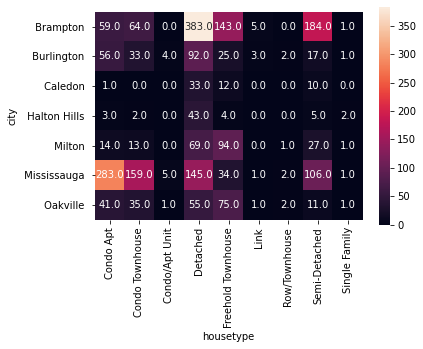

In [1126]:
#Distribution of house type in different cities
sns.heatmap(table,
                #cmap='coolwarm',
                annot=True,
                fmt=".1f",
                annot_kws={'size':10},
                cbar=True,
                square=True,
                xticklabels=True,
                yticklabels=True
               )

### 3. Average Days Properties Stayed in Market

In [1182]:
# Building pivot table to get average days properties stayed in the market.
avg_days_on_markets = df2.pivot_table(index='city',columns='housetype',values = 'days_on_market', aggfunc = "mean")
avg_days_on_markets

housetype       Condo Apt  Condo Townhouse  Condo/Apt Unit  Detached  \
city                                                                   
 Brampton       23.728814         7.468750             NaN  5.146214   
 Burlington     23.410714         8.121212           65.25  5.489130   
 Caledon        21.000000              NaN             NaN  9.696970   
 Halton Hills   21.666667         7.000000             NaN  9.302326   
 Milton          5.357143         6.153846             NaN  6.768116   
 Mississauga    21.706714         9.729560            3.80  5.751724   
 Oakville       25.951220         6.742857           35.00  5.272727   

housetype       Freehold Townhouse  Link  Row/Townhouse  Semi-Detached  \
city                                                                     
 Brampton                 7.643357   2.6            NaN       4.847826   
 Burlington              10.800000  21.0            6.0       4.882353   
 Caledon                  4.500000   NaN            NaN       5.300000   
 Halton Hills             3.500000   NaN            NaN       7.400000   
 Milton                   4.425532   NaN            3.0       3.925926   
 Mississauga              6.500000  16.0            7.5       5.632075   
 Oakville                 5.613333  13.0            3.5       4.545455   

housetype       Single Family  
city                           
 Brampton                 2.0  
 Burlington               8.0  
 Caledon                  NaN  
 Halton Hills             9.0  
 Milton                   3.0  
 Mississauga             14.0  
 Oakville                 6.0

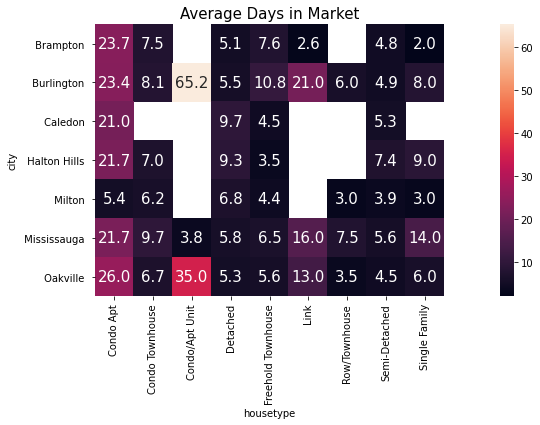

In [1183]:
#Using the above table to build heat map.
plt.subplots(figsize=(20,5))
sns.heatmap(avg_days_on_markets,
                #cmap='coolwarm',
                annot=True,
                fmt=".1f",
                annot_kws={'size':15},
                cbar=True,
                square=True,
                xticklabels=True,
                yticklabels=True)
plt.title('Average Days in Market', fontsize = 15) ;

### 4. Price paid in comparison to Listing Price

In [723]:
# Using pivot table to get the difference paid by the buyer for the properties with the listing price
bidding_war = df2.pivot_table(index='city',columns='housetype',values = 'sold_vs_askprice', aggfunc = "mean")

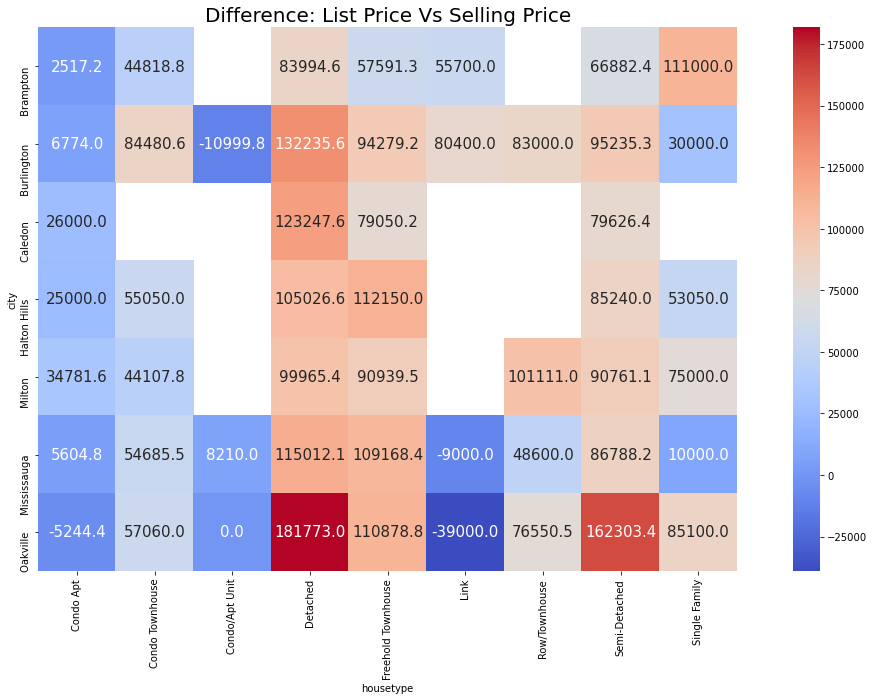

In [1080]:
#Built heatmap to see how much money buyer paid above/ below the assking price 
plt.subplots(figsize=(20,10))
sns.heatmap(bidding_war,
                cmap='coolwarm',
                annot=True,
                fmt=".1f",
                annot_kws={'size':15},
                cbar=True,
                square=True,
                xticklabels=True,
                yticklabels=True);
plt.title('Difference: List Price Vs Selling Price', fontsize = 20) ;

### 5. Listing Price Vs Selling Price

In [1097]:
#Creating dataframes for listing and selling price and merge both the tables to build new dataframe "d"
listing = df2.groupby('city')['listed_price'].mean().astype('int64').reset_index(name = 'avg_list_price')
sell = df2.groupby('city')['sold'].mean().astype('int64').reset_index(name = 'avg_selling_price')
pd.concat([listing, sell], axis=1)
d = pd.merge(listing, sell, on="city")

In [1125]:
#Using the above dataframe to compare average listed price vs average selling price in every city.
import plotly.express as px


fig = px.line(x=d['city'], y=d['avg_selling_price'], color=px.Constant("Average_Selling_Price"),
             labels=dict(x="City", y="Price"))
fig.add_bar(x=d['city'], y=d['avg_list_price'], name="Average_List_Price",marker=dict(color='#F89880'))
fig.show()


In [748]:
# creating dataframe with detached properties only
detached_house = df2[df2['housetype'] == 'Detached']

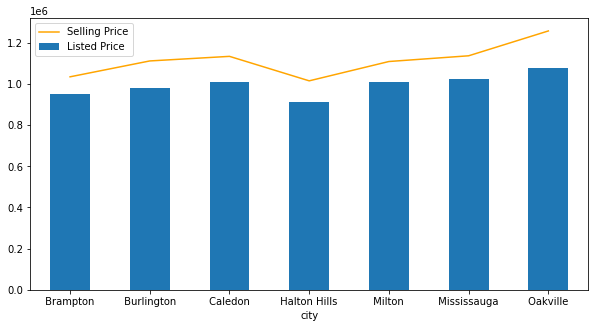

In [1188]:
# Comparing Asking Price with the selling Price for detached properties in every cities.
plt.subplots(figsize=(10,5))
detached_house.groupby('city')['listed_price'].mean().astype('int64').plot(kind = 'bar', label = 'Listed Price');
detached_house.groupby('city')['sold'].mean().astype('int64').plot(kind='line',color='orange', label = 'Selling Price');
plt.legend();

### Conclusion:
- Detached , Semi-Detached and Townhouse were sold in less than 2 weeks of their listings. 

- Detached properties were sold approximately 80k - 190k above of their asking price. 

- Condos took 3-4 weeks to get sold.

- Buyers prefer to buy Detached and Townhouses than condos/Apt Units.

- Pandemic and Immigrants does impact the prices and demand and supply of Real Estate.

- Sharp increase in the housing market gave old buyers an additional disposal income to invest in new properties.
